In [14]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.animation
%matplotlib inline

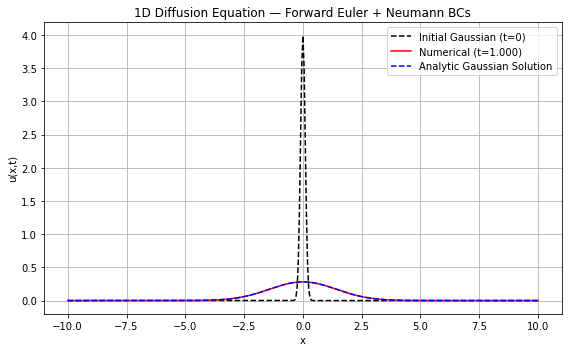

Total mass (numerical): 1.000000
Total mass (analytic):  1.000000
Relative mass error:    0.000%


In [40]:
# Parameters and grid setup
D = 1.0            # Diffusion coefficient
L = 10.0           # Domain half-length [-L, L]  (bigger domain -> less boundary loss)
Nx = 401           # Number of grid points
x = np.linspace(-L, L, Nx)
dx = x[1] - x[0]

# Stability condition (Forward Euler): λ = D*dt/dx² ≤ 0.5
dt = 0.4 * dx**2 / D
Nt = 1000          # Number of time steps to evolve


# Initial condition: Gaussian approximation of δ(x)
x0 = 0.0           # center of the Gaussian (delta location)
sigma = 2 * dx     # width of initial Gaussian (~2 grid spacings)

u = (1 / np.sqrt(2 * np.pi * sigma**2)) * np.exp(-(x - x0)**2 / (2 * sigma**2))
u /= np.sum(u) * dx    # Normalize so total mass ≈ 1
u0 = u.copy()          # Save initial condition for plotting


# Forward Euler finite difference time stepping
λ = D * dt / dx**2

for n in range(Nt):
    u_new = u.copy()
    
    # Interior points update
    for i in range(1, Nx - 1):
        u_new[i] = u[i] + λ * (u[i + 1] - 2 * u[i] + u[i - 1])
    
    # Neumann (zero-flux) boundary conditions
    u_new[0] = u_new[1]       # du/dx = 0 at left boundary
    u_new[-1] = u_new[-2]     # du/dx = 0 at right boundary
    
    u = u_new.copy()


# Analytic Gaussian solution at time t = Nt*dt
t = Nt * dt
u_exact = (1 / np.sqrt(4 * np.pi * D * t)) * np.exp(-(x - x0)**2 / (4 * D * t))
u_exact /= np.sum(u_exact) * dx   # normalize for fair comparison


# Plot results
plt.figure(figsize=(8,5))
plt.plot(x, u0, 'k--', label='Initial Gaussian (t=0)')
plt.plot(x, u, 'r-', label=f'Numerical (t={t:.3f})')
plt.plot(x, u_exact, 'b--', label='Analytic Gaussian Solution')
plt.xlabel('x')
plt.ylabel('u(x,t)')
plt.title('1D Diffusion Equation — Forward Euler + Neumann BCs')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Mass conservation check
mass_numerical = np.sum(u) * dx
mass_exact = np.sum(u_exact) * dx
print(f"Total mass (numerical): {mass_numerical:.6f}")
print(f"Total mass (analytic):  {mass_exact:.6f}")
print(f"Relative mass error:    {abs(mass_numerical - mass_exact)/mass_exact*100:.3f}%")
